In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import copy

### Constants

In [2]:
DATA_PATH = "../data/raw/istanbul_weather.csv"

### Loading the data

In [3]:
def load_data(path: str):
    """This function loads the data from the given path."""
    
    if os.path.exists(path):
        return pd.read_csv(path)
    else:
        raise FileNotFoundError(f"File not found at {path}")

In [4]:
df = load_data(DATA_PATH)
df.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,precipitation,weather_code,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,soil_temperature_0_to_7cm
0,2006-01-01T00:00,5.1,93,4.0,1018.7,0.0,0,5,0.0,9.0,143,5.9
1,2006-01-01T01:00,4.7,93,3.7,1018.6,0.0,0,5,0.0,9.2,141,5.4
2,2006-01-01T02:00,5.0,92,3.8,1018.4,0.0,0,15,0.0,9.3,144,5.0
3,2006-01-01T03:00,5.6,91,4.3,1018.5,0.0,0,19,0.0,9.5,151,4.6
4,2006-01-01T04:00,6.1,90,4.7,1018.5,0.0,0,9,0.0,9.4,157,4.3


### Control Nan values in each column

In [5]:
def check_missing_data(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    mis_val_dtype = df.dtypes
    
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    mis_val_table_renamed = mis_val_table.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri', 2 : 'Veri Tipi'})
    
    mis_val_table_renamed = mis_val_table_renamed[
        mis_val_table_renamed.iloc[:,1] != 0].sort_values(
        '% Değeri', ascending=False).round(2)
    
    print(f"Total feature: {len(df.columns)}")
    print(f"Missing feature: {mis_val_table_renamed.shape[0]}")
    
    return mis_val_table_renamed

In [6]:
check_missing_data(df)

Total feature: 12
Missing feature: 0


,Eksik Değerler,% Değeri,Veri Tipi


### Dataset information

In [7]:
df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,precipitation,weather_code,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,soil_temperature_0_to_7cm
count,175800.000000,175800.000000,175800.000000,175800.000000,175800.000000,175800.000000,175800.00000,175800.000000,175800.000000,175800.000000,175800.000000
mean,15.209908,75.647253,10.589929,1011.352464,0.079688,8.782730,47.47773,177.168652,14.621527,118.336695,16.245369
std,7.540353,14.135567,6.476791,6.537146,0.348814,18.744088,39.92180,254.642998,7.597925,101.962436,8.632981
min,-6.900000,13.000000,-11.700000,975.700000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-3.300000
25%,9.100000,66.000000,5.800000,1006.900000,0.000000,0.000000,5.00000,0.000000,8.700000,38.000000,9.200000
50%,14.900000,77.000000,10.600000,1010.800000,0.000000,1.000000,42.00000,8.000000,13.500000,60.000000,15.200000
75%,21.500000,87.000000,16.000000,1015.400000,0.000000,3.000000,94.00000,310.000000,19.500000,208.000000,22.500000
max,39.600000,100.000000,25.500000,1035.500000,16.400000,75.000000,100.00000,971.000000,55.700000,360.000000,44.400000


### Temperature Analysis

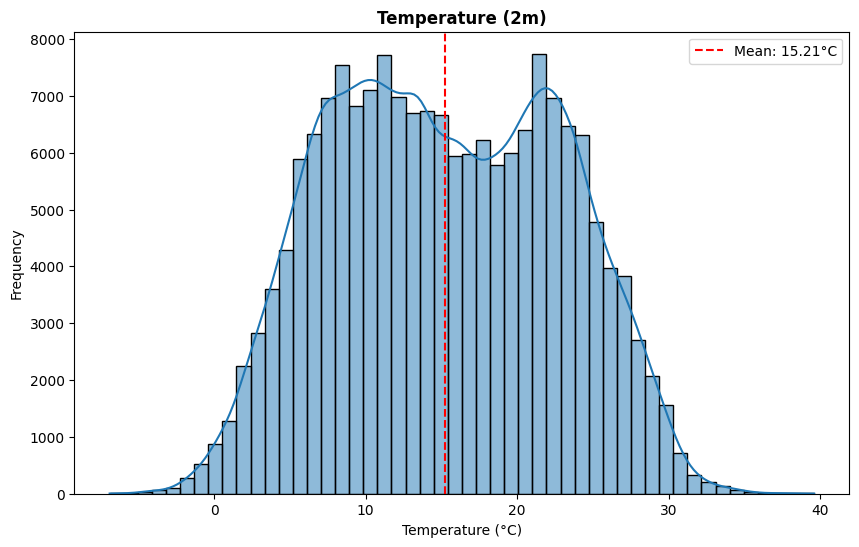

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_2m'], bins=50, kde=True, color='#1f77b4')
plt.title('Temperature (2m)', fontsize=12, fontweight='bold')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.axvline(df['temperature_2m'].mean(), color='red', linestyle='--', label=f"Mean: {df['temperature_2m'].mean():.2f}°C")
plt.legend()
plt.show()

### Temperature Time Series Analysis

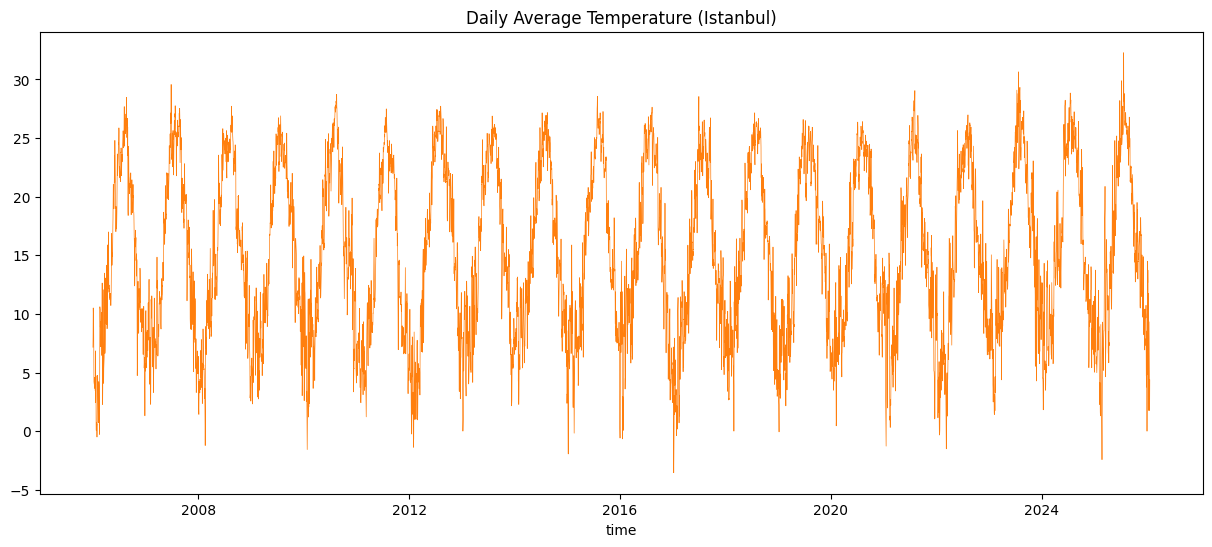

In [12]:
df_copyed = copy.deepcopy(df)

df_copyed['time'] = pd.to_datetime(df_copyed['time'])
df_copyed.set_index('time', inplace=True)
daily_temp = df_copyed['temperature_2m'].resample('D').mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_temp.index, y=daily_temp.values, linewidth=0.5, color='#ff7f0e')
plt.title("Daily Average Temperature (Istanbul)")
plt.show()

### Correlation Analysis

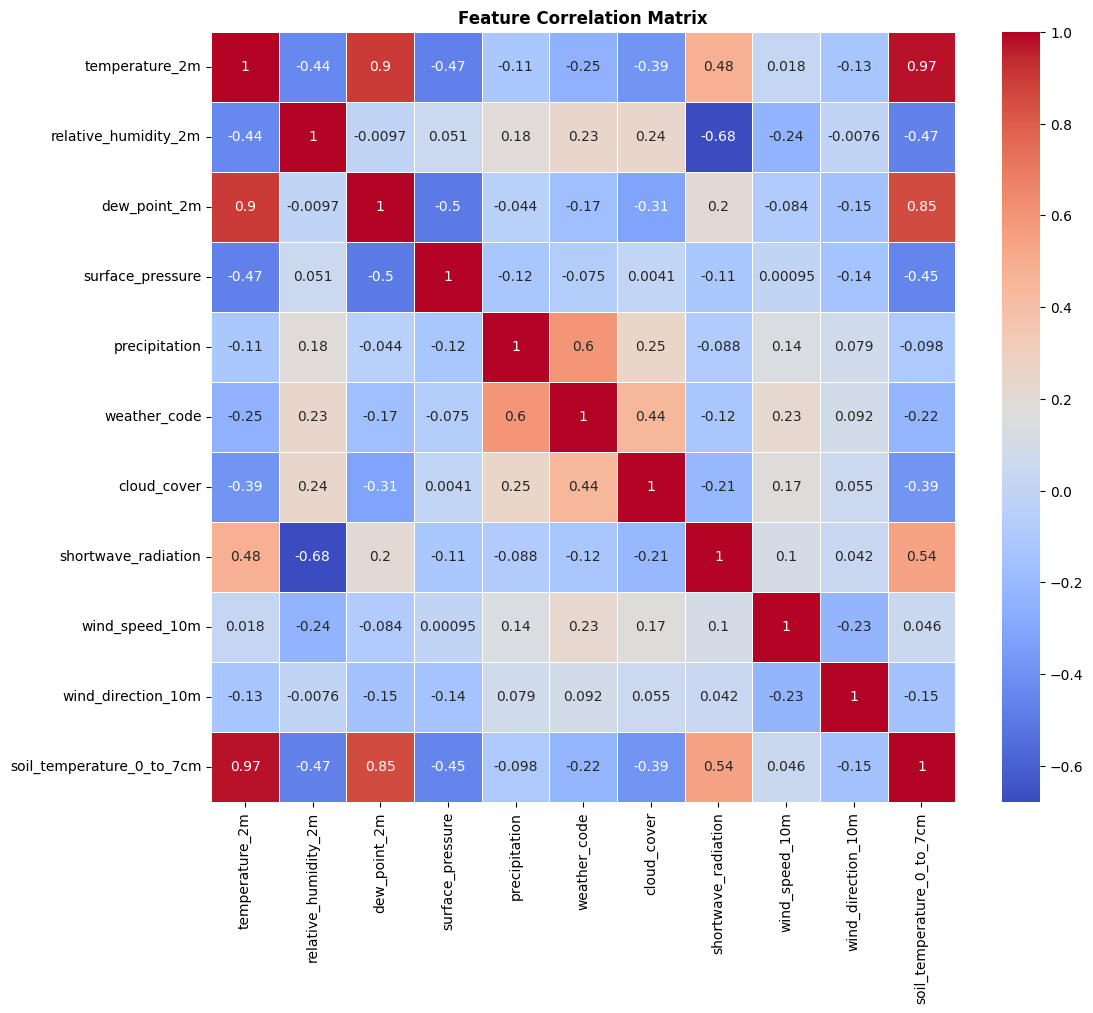

In [17]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_copyed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()